In [92]:
#import required libraries
import pandas as pd
import numpy as np

#read the dataset using pandas
dataset = pd.read_csv('Output.csv')
dataset2 = pd.read_csv('Labels.csv')

dataset.head()

,Unnamed: 0,Mean_R,RMS_R,Median_R,Variance_R,Std_R,Skewness_R,Kurtosis_R,Contrast_R,Entropy_R,...,Std_B,Skewness_B,Kurtosis_B,Contrast_B,Entropy_B,Energy_B,Homogeneity_B,Correlation_B,IDM_B,Smoothness_B
0,0,0.506447,0.538710,0.529412,0.033720,0.183630,-0.471316,0.045042,7.462803,840.679442,...,0.206684,-0.298699,-0.528658,7.575893,828.484390,0.011288,0.070849,0.850968,0.001206,0.012641
1,1,0.560126,0.577518,0.580392,0.019786,0.140663,-1.394636,3.094194,6.925821,844.840533,...,0.194109,-0.421625,-0.751318,7.454337,830.971385,0.011768,0.063501,0.830620,0.001202,0.012680
2,2,0.508093,0.535066,0.537255,0.028137,0.167742,-0.684491,0.282048,7.344415,1102.942923,...,0.202585,-0.647186,-0.260827,7.536181,1099.291835,0.009447,0.047230,0.794473,0.000909,0.016774
3,3,0.541484,0.566322,0.564706,0.027515,0.165877,-1.141966,1.258940,7.085799,572.447181,...,0.203459,0.214111,-1.166221,7.435953,565.787577,0.013982,0.104047,0.894747,0.001764,0.008633
4,4,0.592456,0.619403,0.627451,0.032655,0.180708,-1.024813,0.610256,7.303880,604.243244,...,0.242869,-0.386087,-0.992125,7.675357,604.860417,0.016680,0.148555,0.921239,0.001651,0.009229


In [93]:
dataset2.head()

,Label
0,1
1,1
2,1
3,1
4,1


In [94]:
#remove the first column from dataset1
dataset1 = dataset.drop(['Unnamed: 0'], axis=1)

In [95]:
#now find info about dataset
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 42 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mean_R         300 non-null    float64
 1   RMS_R          300 non-null    float64
 2   Median_R       300 non-null    float64
 3   Variance_R     300 non-null    float64
 4   Std_R          300 non-null    float64
 5   Skewness_R     300 non-null    float64
 6   Kurtosis_R     300 non-null    float64
 7   Contrast_R     300 non-null    float64
 8   Entropy_R      300 non-null    float64
 9   Energy_R       300 non-null    float64
 10  Homogeneity_R  300 non-null    float64
 11  Correlation_R  300 non-null    float64
 12  IDM_R          300 non-null    float64
 13  Smoothness_R   300 non-null    float64
 14  Mean_G         300 non-null    float64
 15  RMS_G          300 non-null    float64
 16  Median_G       300 non-null    float64
 17  Variance_G     300 non-null    float64
 18  Std_G     

In [96]:
#find no of 0 and 1
dataset2['Label'].value_counts()

1    270
0     30
Name: Label, dtype: int64

In [97]:
#distribute data into dependent and independent variables x and y
x = dataset1.iloc[:, :]
y = dataset2.iloc[:, :]


In [98]:
#split data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.17, random_state=0)

#lets now apply lightGBM
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier()
lgb_classifier.fit(x_train, y_train)

#predict using model
pred = lgb_classifier.predict(x_test)

#now find accuracy
from sklearn.metrics import accuracy_score
print("Accuracy is ", accuracy_score(y_test, pred))

Accuracy is  0.9230769230769231


/home/uca/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/uca/.local/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [99]:
#now test the accuracy x_train data

x_train_pred = lgb_classifier.predict(x_train)

print("The accuracy for train data is ", accuracy_score(y_train, x_train_pred))

The accuracy for train data is  1.0


[[ 0  3]
 [ 1 48]]


<Axes: >

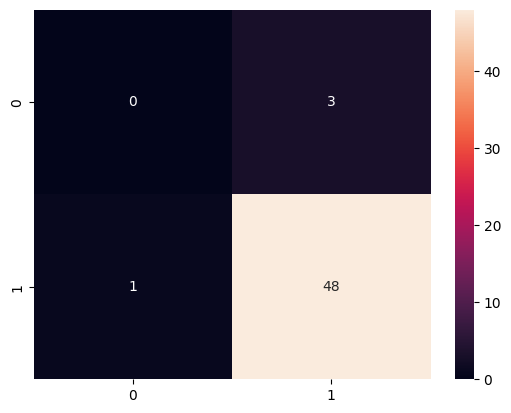

In [100]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm_matrix = confusion_matrix(y_test, pred)
print(cm_matrix)

#create a heatmap to analyze the results
import seaborn as sns
sns.heatmap(cm_matrix, annot=True)

<Axes: >

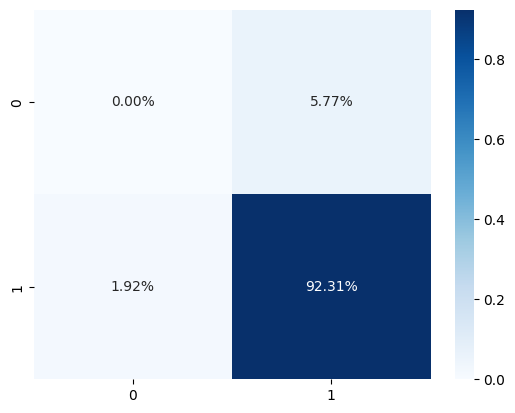

In [102]:
sns.heatmap(cm_matrix/np.sum(cm_matrix), annot=True, 
            fmt='.2%', cmap='Blues')